<a href="https://colab.research.google.com/github/RafaelLuci/Data-Science-com-Python/blob/main/Introdu%C3%A7%C3%A3o_a_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analizando as notas no geral


In [ ]:
#Importando o pands
import pandas as pd
#Importando a planilha
notas = pd.read_csv("ratings.csv")

In [ ]:
#Mostrando apenas os 5 primeiros
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
#Mostra o formato
notas.shape

(100836, 4)

In [ ]:
#Auterando o nome das colunas
notas.columns = ["UsuárioID", "filmeID", "Nota", "Momento"]
notas.head()

,UsuárioID,filmeID,Nota,Momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
#Mostrando as notas possíveis
notas['Nota'].unique()


array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [ ]:
#Pedindo para contar quantas
notas['Nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: Nota, dtype: int64

In [ ]:
#Mostrando a média
print ('Méia: ', notas['Nota'].mean())
#Mostrando o mediano
print ('Mediana: ',notas['Nota'].median())

Méia:  3.501556983616962
Mediana:  3.5


<Axes: ylabel='Frequency'>

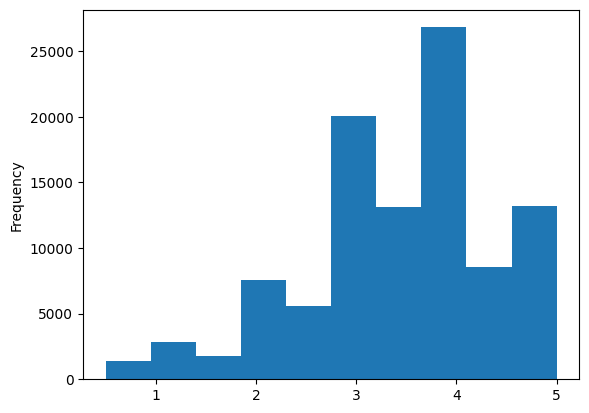

In [ ]:
#Plotando notas no estilo Hist
notas.Nota.plot(kind='hist')

In [ ]:
#Mostra as quartas (média, mínima, conta, máxima, tipos)
notas.Nota.describe()


count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: Nota, dtype: float64

<Axes: ylabel='Nota'>

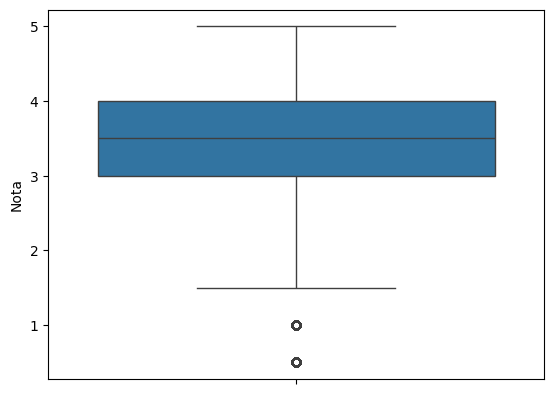

In [ ]:
#Importando seaborn
import seaborn as sns
#Boxplot do sns
sns.boxplot(notas.Nota)

# Verificando os filmes

In [ ]:
#Lendo a planílha movies.csv
filmes = pd.read_csv('movies.csv')
#Auterando o nome das colunas
filmes.columns =['filmeID', 'titulo', 'generos']
#5 primeiros do filmes
filmes.head()

,filmeID,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
#5 primeiros do notas
notas.head()

,UsuárioID,filmeID,Nota,Momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


# Verificando notas específicas

In [ ]:
#Trazendo as colunas na qual só o filmeID é igual a 1
notas.query('filmeID == 1')

,UsuárioID,filmeID,Nota,Momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [ ]:
#Trazendo as colunas na qual só o filmeID é igual a 1 apenas as notas
notas.query('filmeID == 1').Nota

0        4.0
516      4.0
874      4.5
1434     2.5
1667     4.5
        ... 
97364    2.5
98479    4.0
98666    2.5
99497    3.0
99534    5.0
Name: Nota, Length: 215, dtype: float64

In [ ]:
#Trazendo as colunas na qual só o filmeID é igual a 1 apenas a MÉDIA das notas
notas.query('filmeID == 1').Nota.mean()

3.9209302325581397

In [ ]:
#Trazendo as colunas na qual só o filmeID é igual a 2
notas.query('filmeID == 2').Nota.mean()

3.4318181818181817

In [ ]:
#Agrupando as notas pelo filme (vendo a média de todos de uma vez só)
medias_por_filme = notas.groupby('filmeID').mean().Nota
medias_por_filme.head()

filmeID
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: Nota, dtype: float64

<Axes: ylabel='Frequency'>

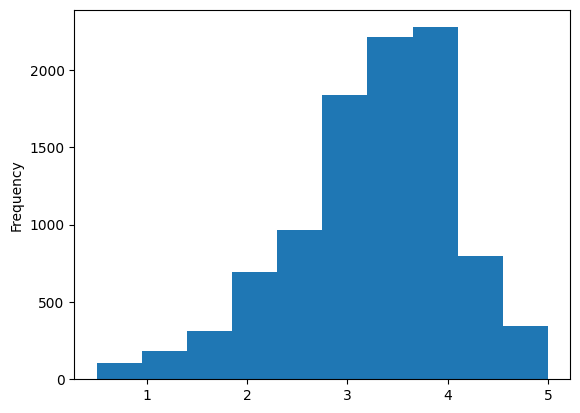

In [ ]:
#Plotando(criando um gráfico)
medias_por_filme.plot(kind = 'hist')

<Axes: ylabel='Nota'>

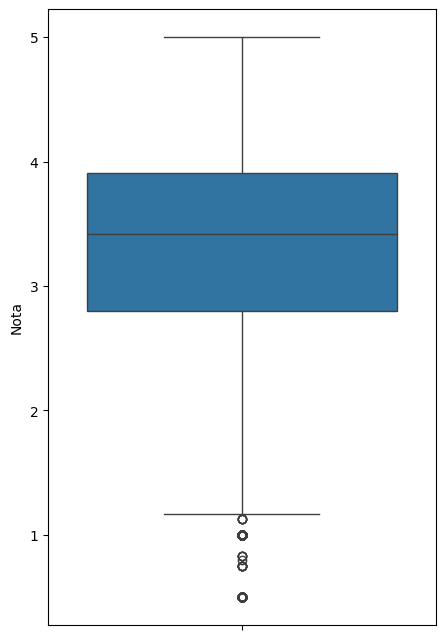

In [ ]:
#importando matplot
import matplotlib.pyplot as plt
#Como o boxplot tem sua raiz no matplot é possível aplicar configurações

#Redimencionando o gráfico
plt.figure(figsize=(5,8))
#Fazendo o boxplot
sns.boxplot(medias_por_filme)

In [ ]:
#Estatísticas descritivas
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: Nota, dtype: float64

<ipython-input-72-e905c2b0ea08>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medias_por_filme, bins = 10)


<Axes: xlabel='Nota', ylabel='Density'>

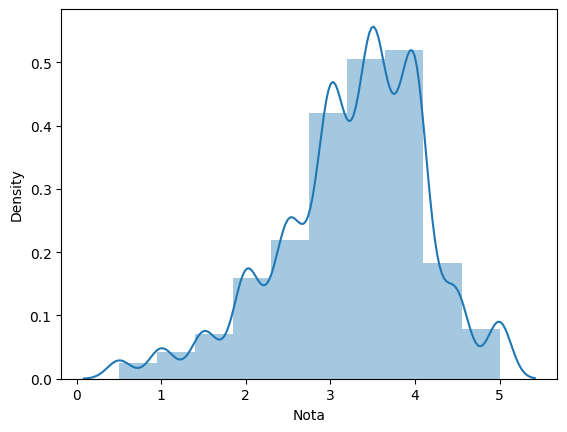

In [ ]:
#Plotando pelo sns
sns.distplot(medias_por_filme, bins = 10)

Text(0.5, 1.0, 'Histograma das médias dos filmes')

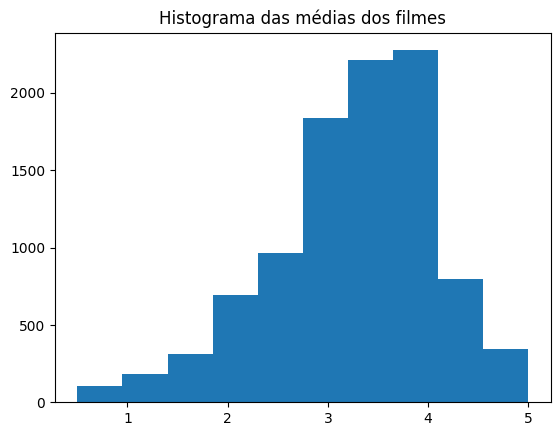

In [ ]:
#Plotando pelo matplot
plt.hist(medias_por_filme)
#Mudando título do gráfico
plt.title('Histograma das médias dos filmes')